In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import pickle

In [3]:
import pyproj
pyproj.datadir.set_data_dir("/home/atmo/bin/anaconda3/envs/rmaiwald_dev/share/proj")

/home/atmo/bin/anaconda3/envs/rmaiwald_dev/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [4]:
from experiments import BasicSetup
from experiments import utilities as utils
from bayesinverse import Regression

In [5]:
from robiplotipy import PlotEnv
import robiplotipy.experiments.basic_setup as plt_exp

In [6]:
config_path = Path(
    "/home/rmaiwald/code/Experiments/experiments/basic_setup/config.yaml"
)

exp = BasicSetup(config_path)
# basic_setup.run()


sensors 0.0135871022939682
emissions 2.63305327296257
transport 30.60292774438858


In [7]:
source_group_path = Path(
    "/mnt/data/users/rmaiwald/GRAMM-GRAL/emissions/pickle_jar/source_groups_infos.csv"
)
source_group_df = pd.read_csv(
    source_group_path,
    index_col=0,
)


In [8]:
path = Path("/mnt/data/users/rmaiwald/")

with open(
    path / "GRAMM-GRAL/emissions/heat_traffic/tno_districts_gdf.pickle",
    "rb",
) as file:
    tno_districts_gdf = pickle.load(file)


In [9]:
abs_emissions = exp.emissions.absolute_emissions

In [10]:
plot_env = PlotEnv(
    fig_path="/home/rmaiwald/results/plotting/basic_setup/",
    logging=True,
    display=True,
)

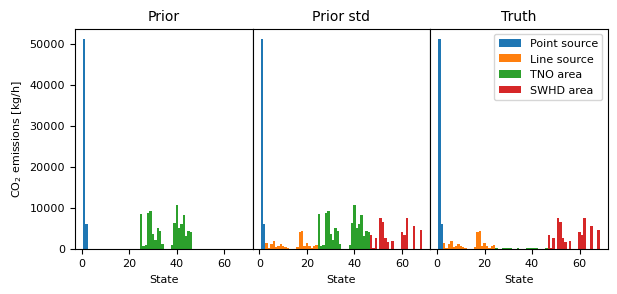

In [16]:
with plot_env(name="emission_bar_chart", notes=exp.config):
    plt_exp.plot_emissions_bar(env=plot_env, source_group_df=source_group_df, exp=exp)


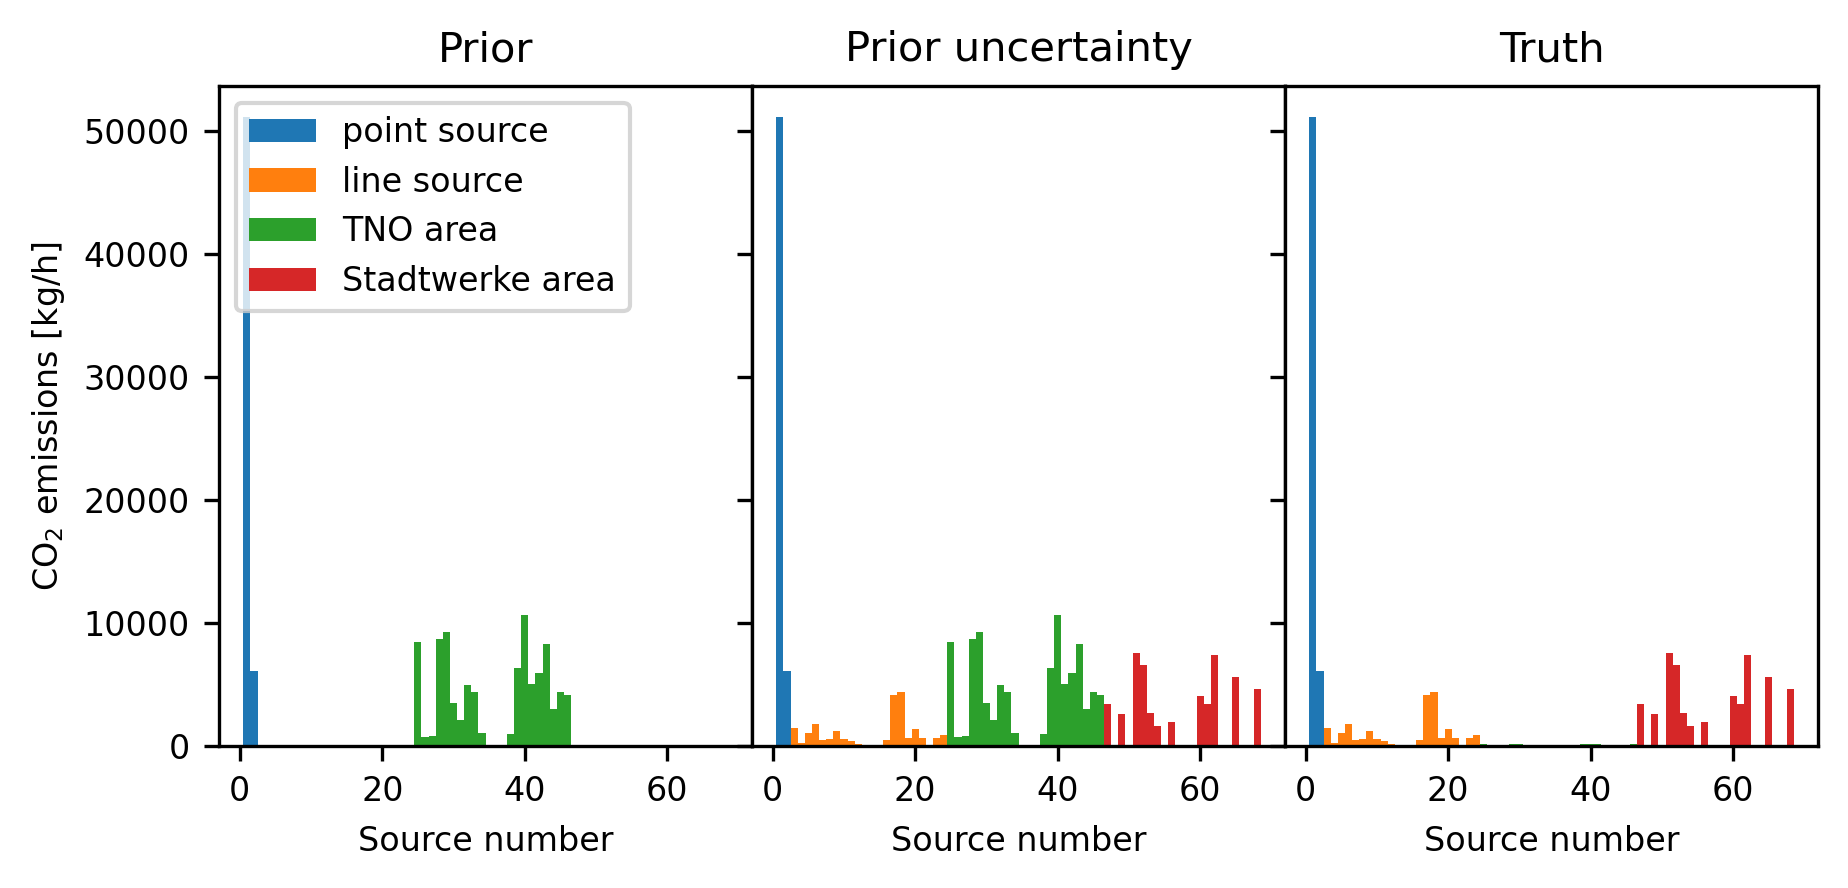

In [13]:
category_list = list(source_group_df["source_type"].unique())
category_list.remove("0.0")

width = 1.0

fig, axs = plt.subplots(1, 3, sharey="row")

for stype, color in zip(category_list, mcolors.TABLEAU_COLORS):
    mask = source_group_df["source_type"] == stype
    index = source_group_df.index[mask]
    label = stype

    emissions = exp.emissions.prior_absolute.mean("time_state").sel(source_group=index)
    axs[0].bar(
        x=index,
        # x=index + 0.5 * width,
        height=emissions,
        width=width,
        label=stype,
        color=color,
        # color="white",
        # edgecolor=color,
        # hatch="//",
    )
    std = (
        np.sqrt(exp.emissions.prior_absolute_variance)
        .mean("time_state")
        .sel(source_group=index)
    )
    axs[1].bar(
        x=index,
        # x=index + 0.5 * width,
        height=std,
        # bottom=emissions - std,
        width=width,
        # label=stype,
        color=color,
        # alpha=0.3,
        # color="white",
        # edgecolor=color,
        # hatch="//",
    )

    # emissions = source_group_df["CO2[kg/hour]"][mask]
    emissions = exp.emissions.truth_absolute.mean("time_state").sel(source_group=index)
    axs[2].bar(
        x=index,
        # x=index - 0.5 * width,
        height=emissions,
        width=width,
        label=label,
        color=color,
    )
axs[0].legend(loc="upper left")
# axs[1].legend()

axs[0].set_ylabel(r"CO$_2$ emissions [kg/h]")

# ymin, ymax = axs[0].get_ylim()
# ymin = -10000
# axs[0].set_ylim(ymin, ymax)

axs[0].set_title("Prior")
axs[1].set_title("Prior uncertainty")
axs[2].set_title("Truth")

axs[0].set_xlabel("Source number")
axs[1].set_xlabel("Source number")
axs[2].set_xlabel("Source number")

plt.tight_layout()
plt.subplots_adjust(wspace=0.0)


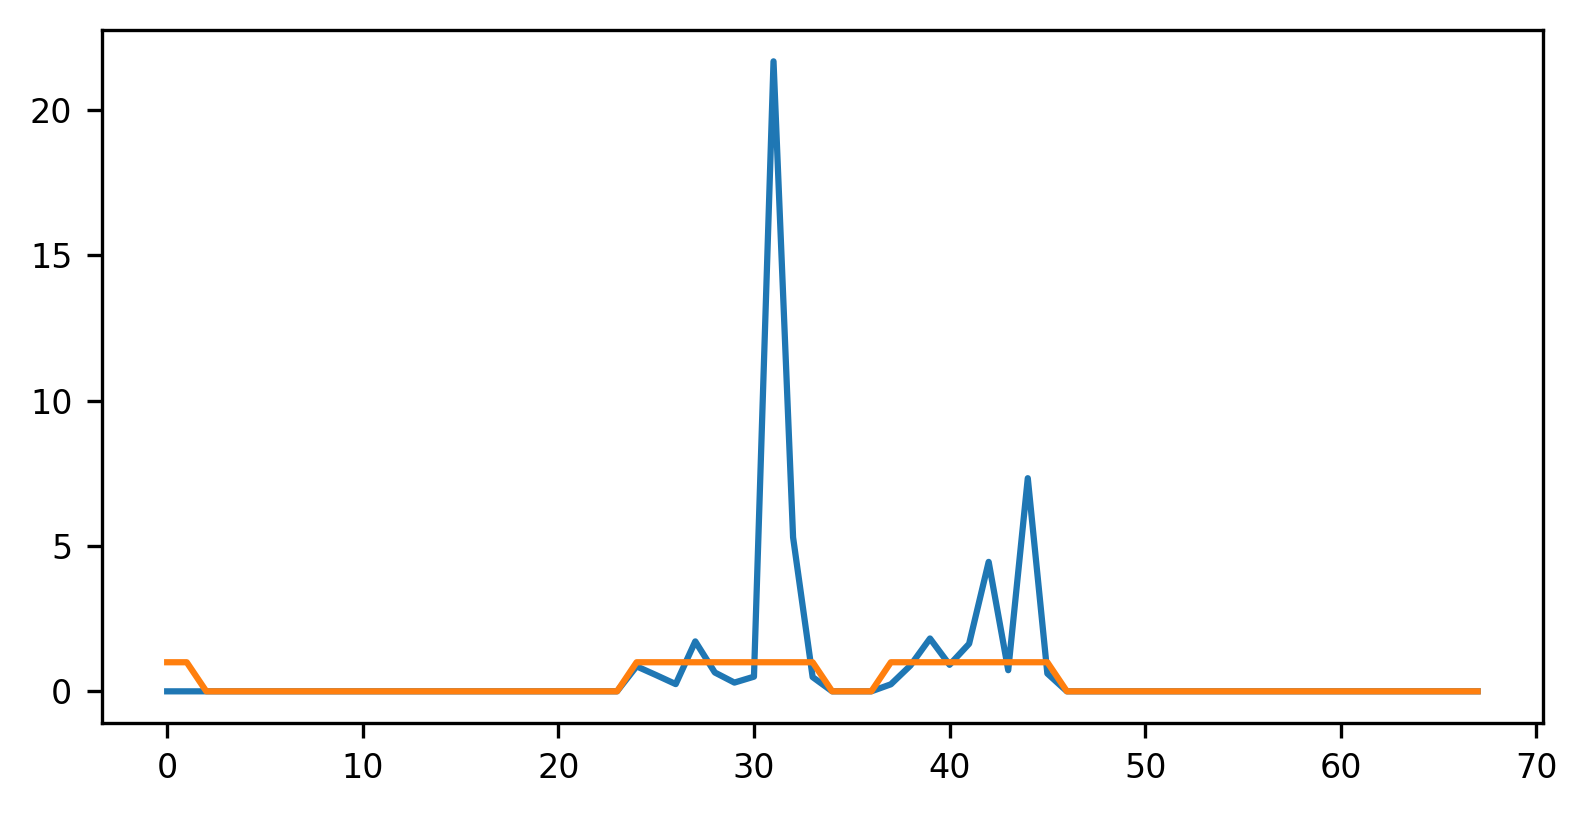

In [14]:
plt.plot(exp.emissions.get_mean_TNO())
plt.plot(exp.emissions.get_TNO())

In [15]:
[(source_group_df["source_type"] == "TNO area").values]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False])]

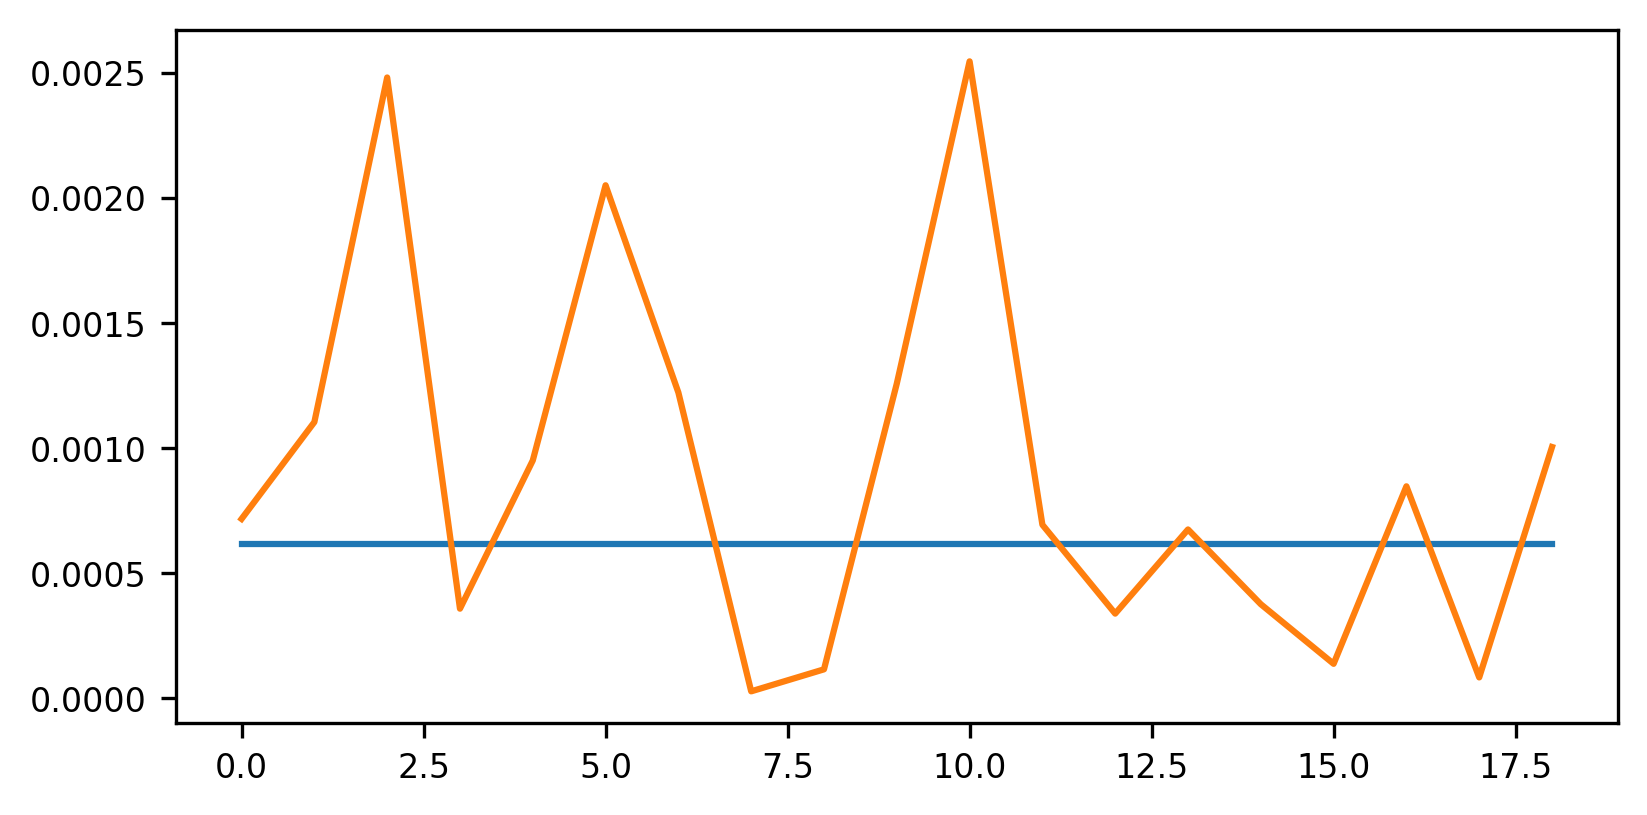

In [16]:
plt.plot(
    (exp.emissions.get_mean_TNO() * exp.emissions.absolute_emissions)[
        (source_group_df["source_type"] == "TNO area").values
    ]
    / tno_districts_gdf["area"]
)
plt.plot(
    (exp.emissions.get_TNO() * exp.emissions.absolute_emissions)[
        (source_group_df["source_type"] == "TNO area").values
    ]
    / tno_districts_gdf["area"]
)


In [17]:
# Sanity check
print((exp.emissions.get_mean_TNO() * exp.emissions.absolute_emissions).sum())
print((exp.emissions.get_TNO() * exp.emissions.absolute_emissions).sum())

<xarray.DataArray ()>
array(93196.74554278)
<xarray.DataArray ()>
array(150418.76026199)


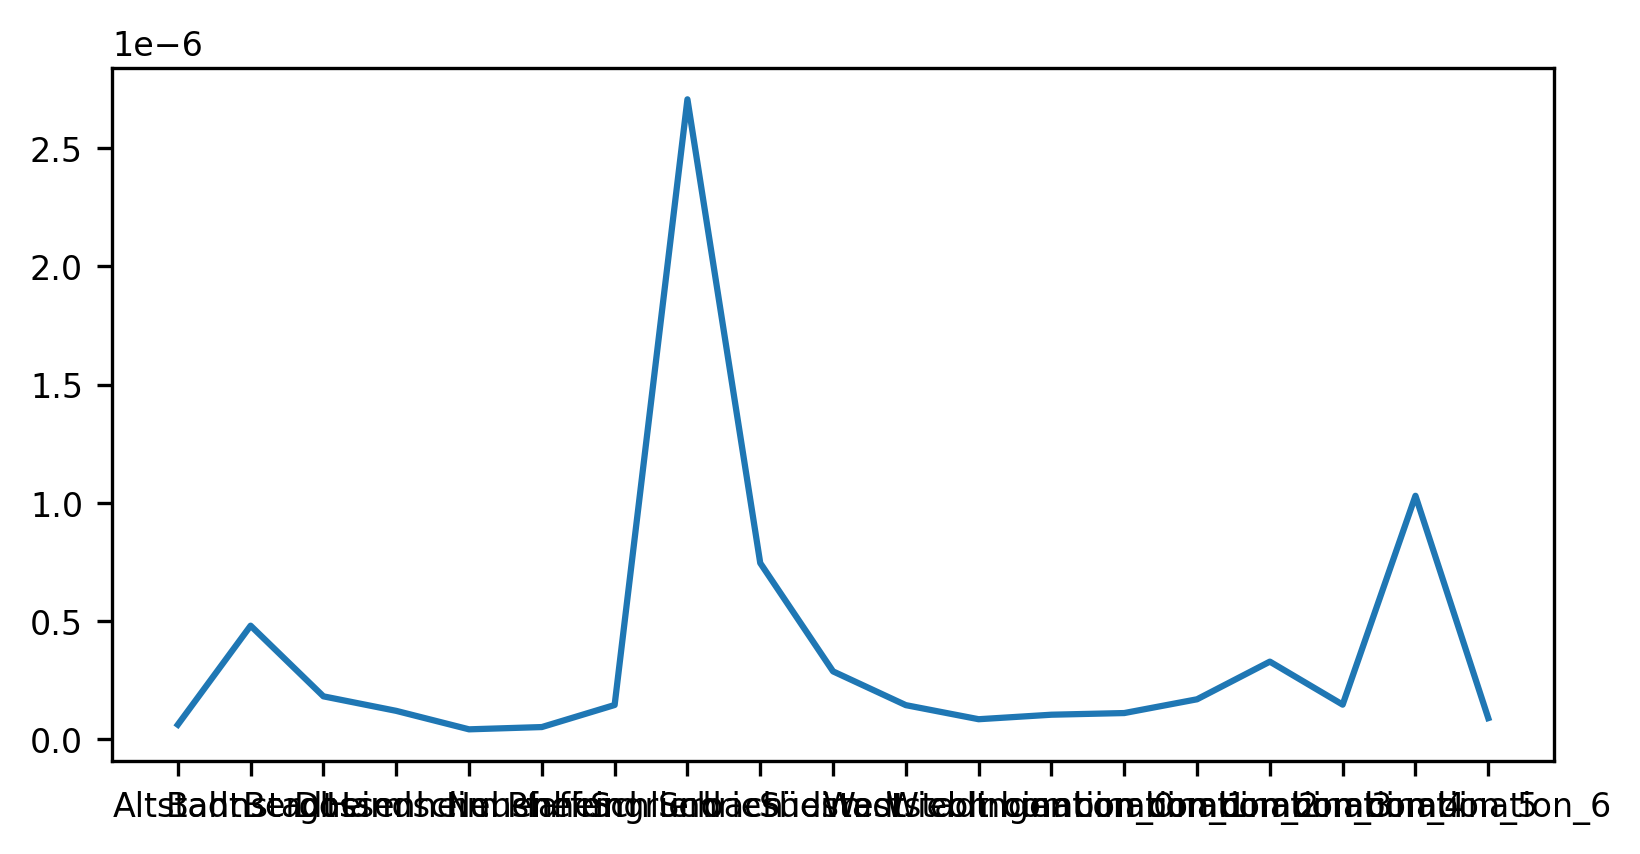

In [18]:
plt.plot(
    exp.emissions.get_mean_TNO()[source_group_df["source_type"] == "TNO area"]
    / tno_districts_gdf["area"] 
)


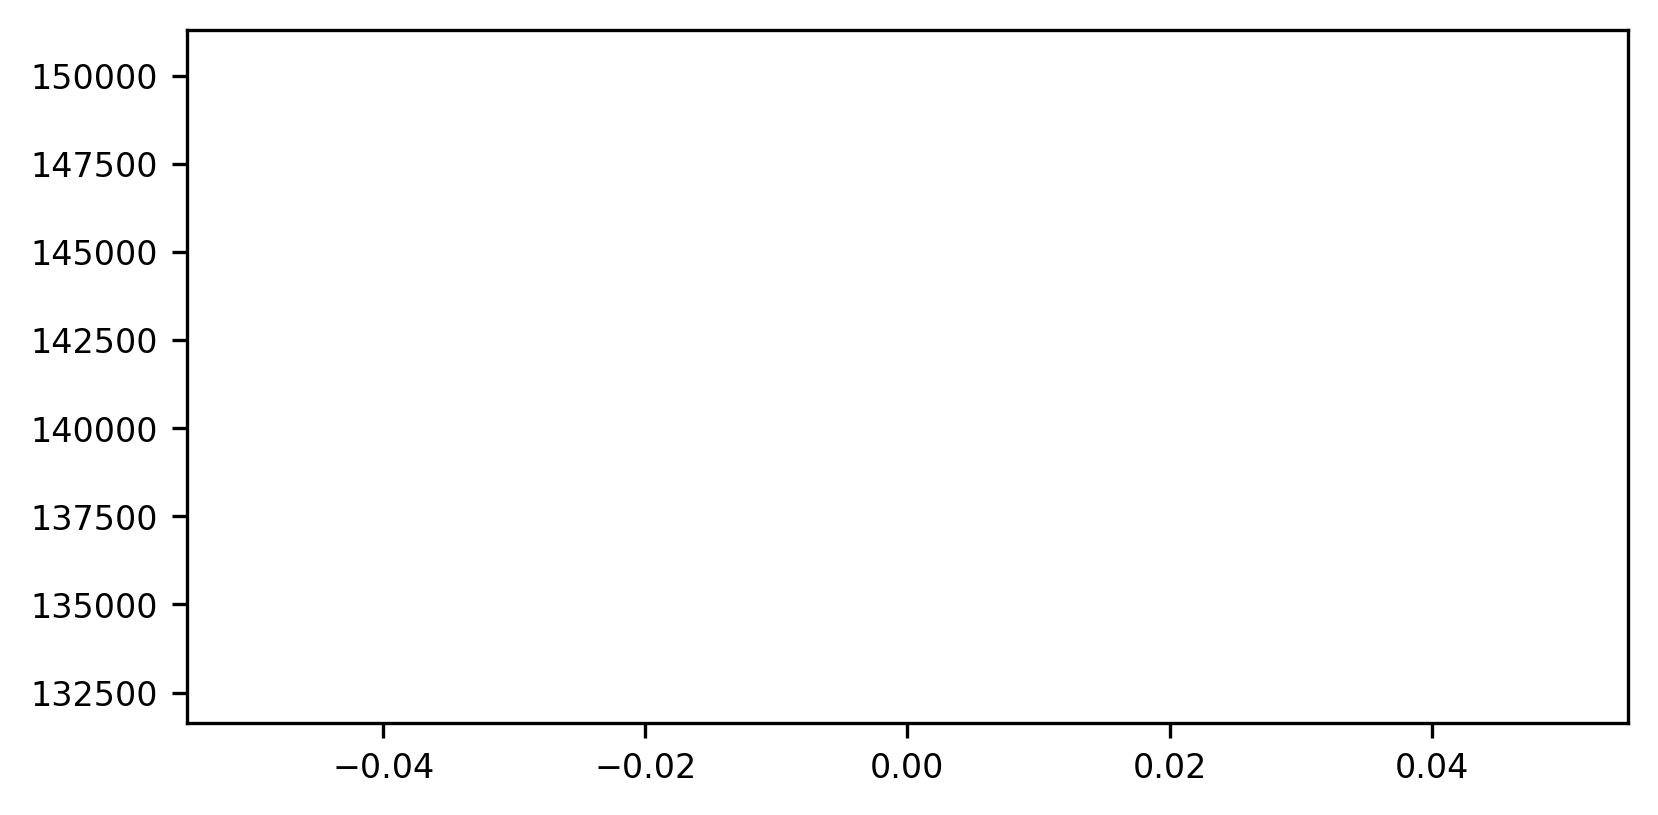

In [19]:
plt.plot(exp.emissions.truth_absolute.sum("source_group"))
plt.plot(exp.emissions.prior_absolute.sum("source_group"))
pass

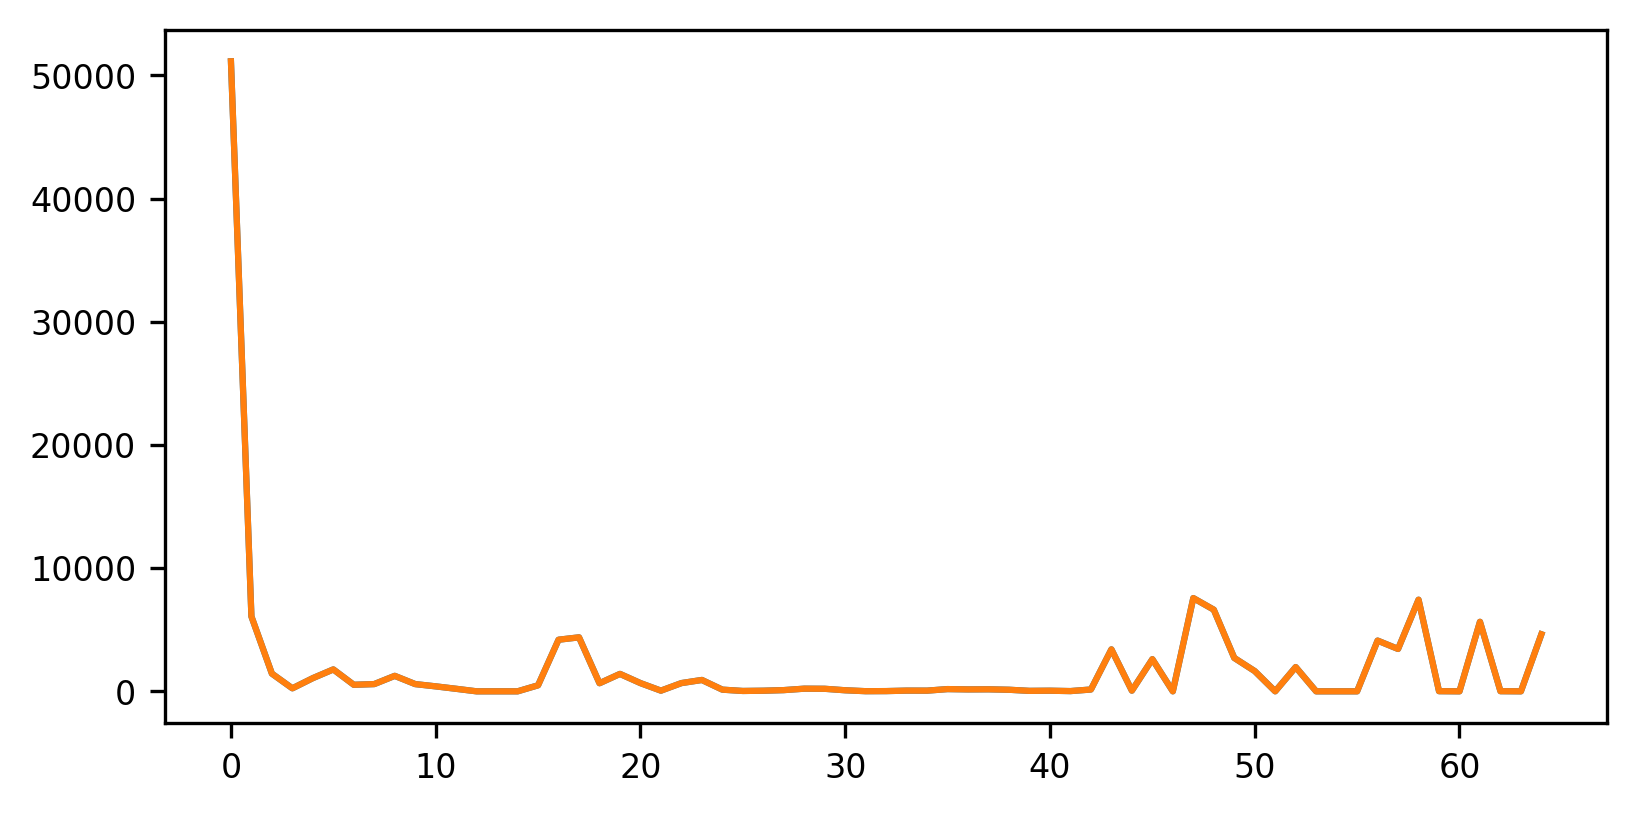

In [20]:
plt.plot(exp.emissions.truth_absolute.min("time_state"))
plt.plot(exp.emissions.truth_absolute.max("time_state"))


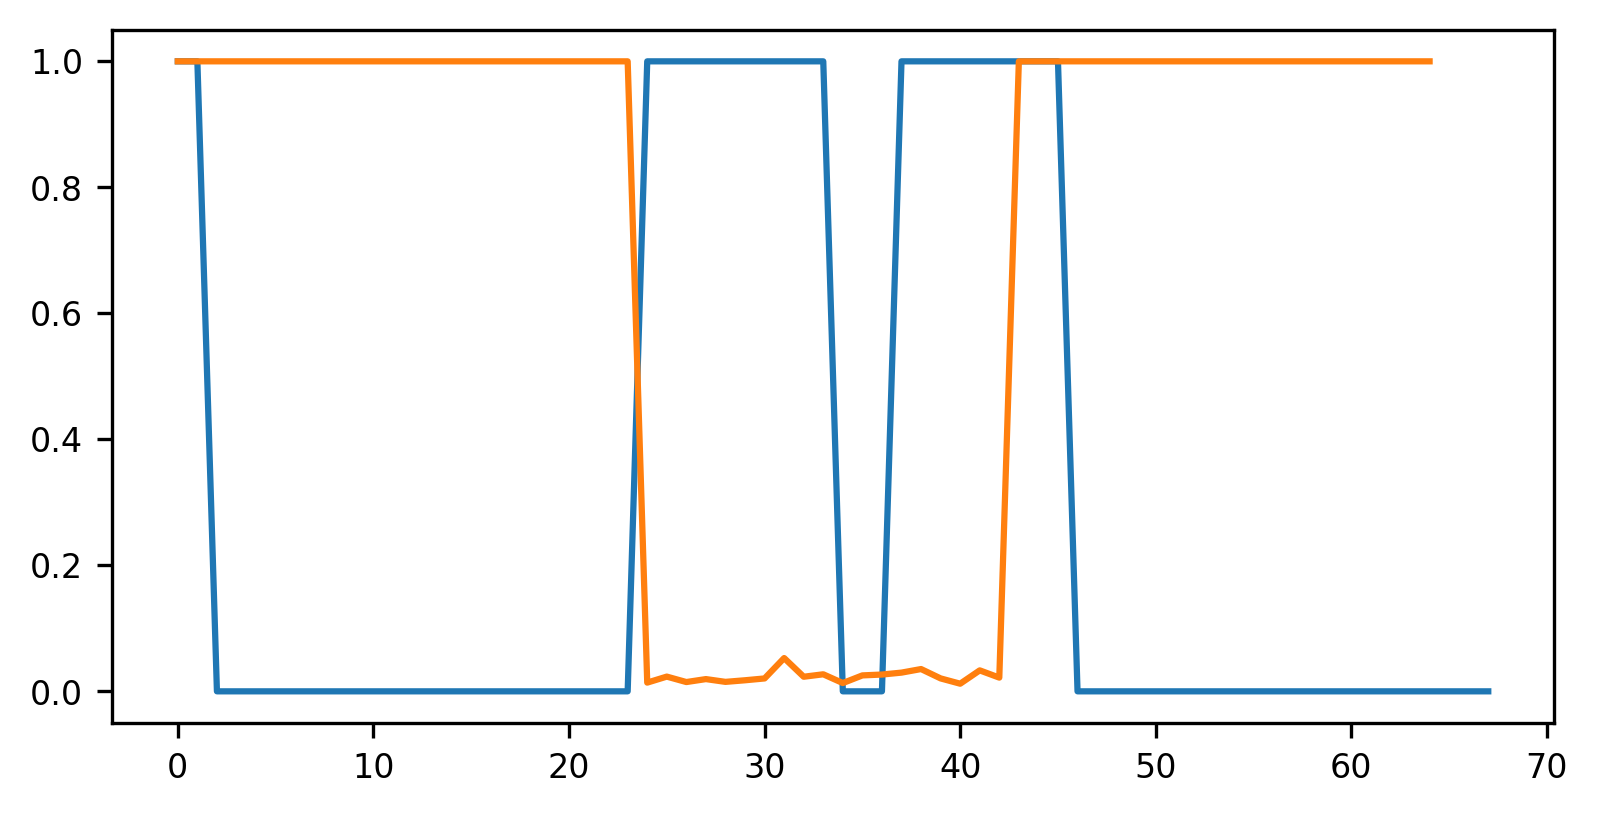

In [21]:
plt.plot(exp.emissions.get_TNO())
plt.plot(exp.emissions.truth.mean("time_state"))


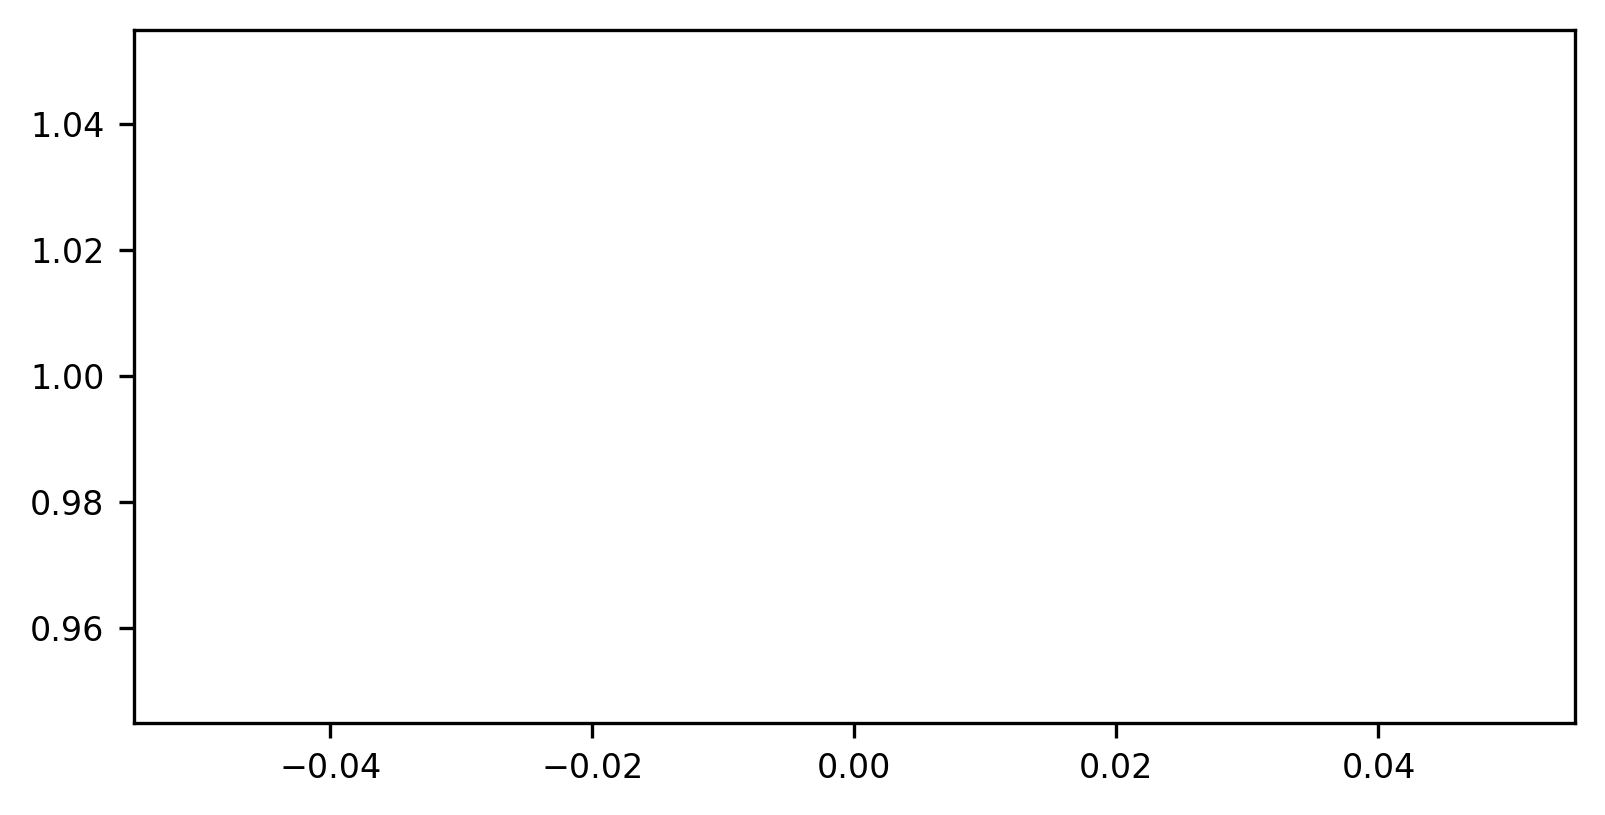

In [22]:
plt.plot(exp.emissions.truth.isel(source_group=10))

In [23]:
exp.K = exp.transport.get_transport(
    exp.sensors.n_sensors, exp.sensors.get_index(), exp.emissions, n_processes=30,
)


loop start 13.66327066719532
loop end 13.699679106473923


In [24]:
""" n_sensor_sample = 20
sensor_ids = exp.sensors.get_sample_ids(n_sensor_sample)

exp.reg = Regression(
    y=utils.stack_xr(
        exp.K.isel(sensor=sensor_ids) @ exp.emissions.truth
        + exp.sensors.get_noise(n_sensor_sample)
    ).values,
    K=utils.stack_xr(exp.K.isel(sensor=sensor_ids)).values,
    x_prior=utils.stack_xr(exp.emissions.prior).values,
    x_covariance=utils.stack_xr(exp.emissions.prior_covariance).values*0.1,
    y_covariance=utils.stack_xr(
        exp.sensors.get_covariance().isel(sensor=sensor_ids)
    ).values,
)
x_est, res, rank, s = exp.reg.fit()
posterior = exp.emissions.to_xr(x_est)
 """

' n_sensor_sample = 20\nsensor_ids = exp.sensors.get_sample_ids(n_sensor_sample)\n\nexp.reg = Regression(\n    y=utils.stack_xr(\n        exp.K.isel(sensor=sensor_ids) @ exp.emissions.truth\n        + exp.sensors.get_noise(n_sensor_sample)\n    ).values,\n    K=utils.stack_xr(exp.K.isel(sensor=sensor_ids)).values,\n    x_prior=utils.stack_xr(exp.emissions.prior).values,\n    x_covariance=utils.stack_xr(exp.emissions.prior_covariance).values*0.1,\n    y_covariance=utils.stack_xr(\n        exp.sensors.get_covariance().isel(sensor=sensor_ids)\n    ).values,\n)\nx_est, res, rank, s = exp.reg.fit()\nposterior = exp.emissions.to_xr(x_est)\n '

In [25]:
exp.reg = Regression(
    y=utils.stack_xr(
        exp.K @ exp.emissions.truth
        + exp.sensors.get_noise()
    ).values,
    K=utils.stack_xr(exp.K).values,
    x_prior=utils.stack_xr(exp.emissions.prior).values,
    x_covariance=utils.stack_xr(exp.emissions.prior_covariance).values,
    y_covariance=utils.stack_xr(
        exp.sensors.get_covariance()
    ).values,
)
x_est, res, rank, s = exp.reg.fit()
posterior = exp.emissions.to_xr(x_est)


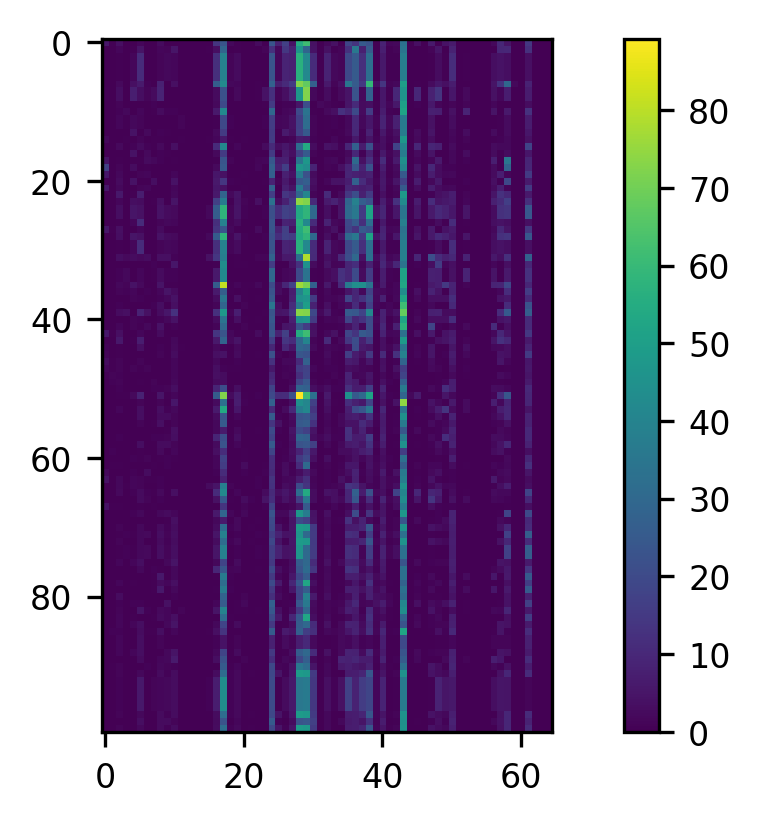

In [26]:
im = plt.imshow(exp.K.sum(dim="sensor"))
plt.colorbar()

In [27]:
exp.emissions.mask


<xarray.DataArray (source_group: 68)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])
Coordinates:
  * source_group  (source_group) int64 1 2 3 4 5 6 7 8 ... 62 63 64 65 66 67 68

In [28]:
measurements = exp.K @ exp.emissions.truth
measurements.attrs["unit"] = "ppm"
measurements.attrs["long_name"] = "Synthetic CO2 measurements"
measurements.coords["time_measurement"] = measurements.time_measurement.values
measurements.time_measurement.attrs["unit"] = "h"
measurements.time_measurement.attrs["long_name"] = "Time"

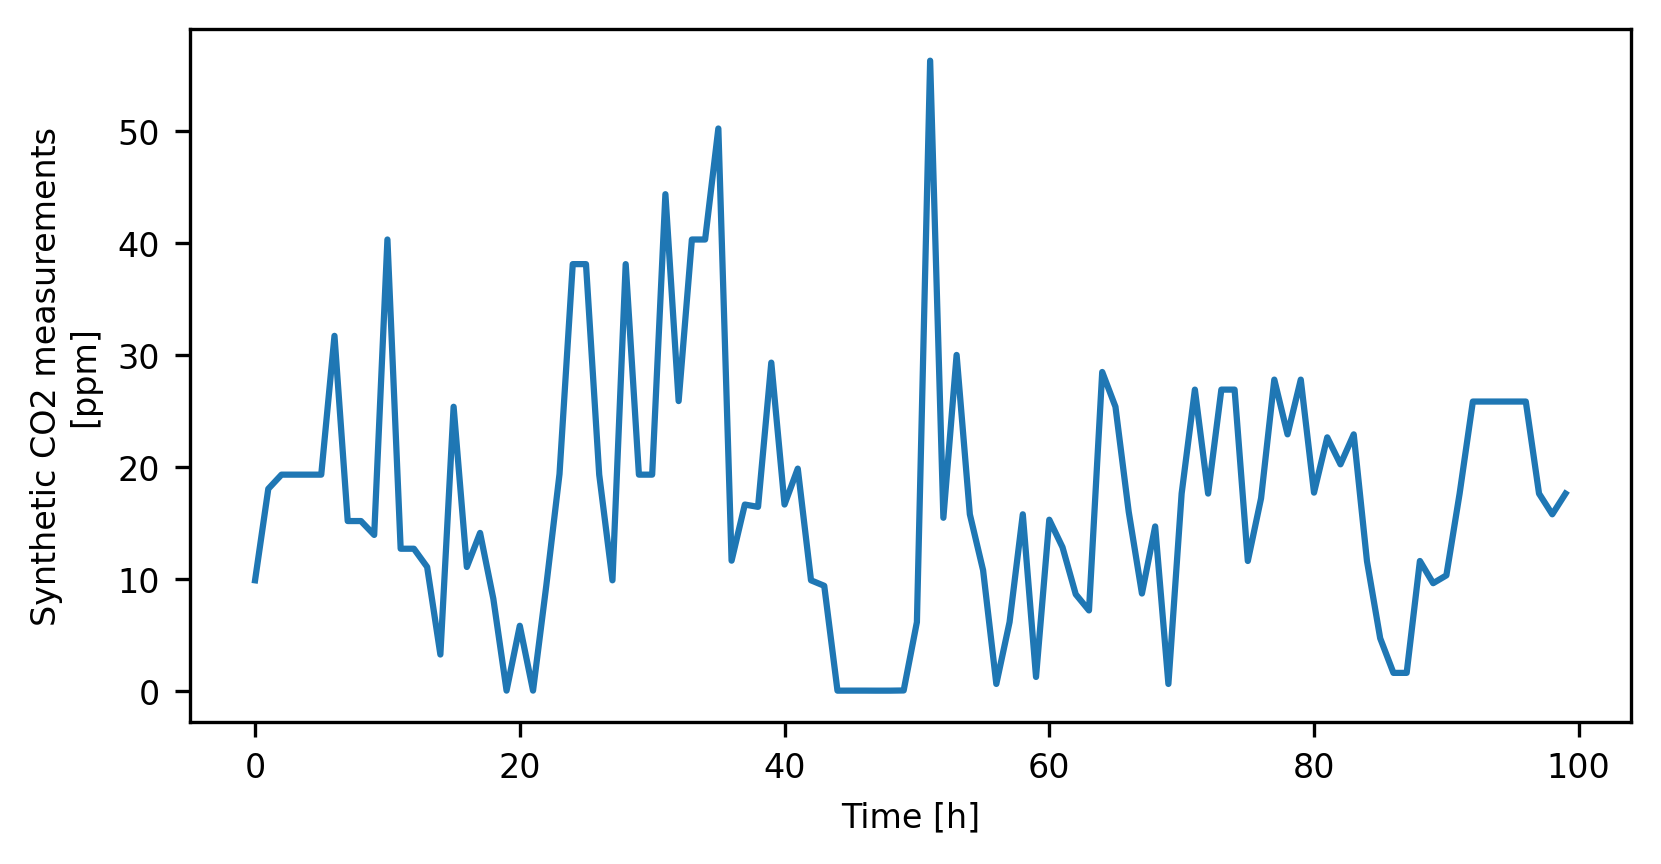

In [29]:
measurements.isel(sensor=0).plot.line()
pass

In [30]:
x_est, res, rank, s = exp.reg.fit()

In [31]:
posterior = exp.emissions.to_xr(x_est)


In [32]:
posterior_scaling_factor = (exp.emissions.get_absolute()[exp.emissions.mask] * utils.unstack_xr(posterior)).isel(
    time_state=0
)


In [33]:
posterior

<xarray.DataArray (state: 65)>
array([ 1.03701442e+00,  1.80978989e+00,  1.18744188e+00,  1.10452748e+00,
        1.16291798e+00,  1.03741734e+00,  9.39985176e-01,  8.84024413e-01,
        1.04504833e+00,  9.72085918e-01,  9.82930244e-01,  4.15291818e-01,
        1.98452366e-14, -1.90958360e-14, -4.66293670e-15,  1.18611018e+00,
        9.91584619e-01,  9.98585270e-01,  1.00067472e+00,  8.93782283e-01,
        9.10881028e-01,  8.64403746e-01,  8.41376476e-01,  9.34701320e-01,
        9.92622015e-03,  1.72046951e-02, -4.22701198e-02,  4.78040757e-02,
        8.33763896e-03,  2.59091099e-02,  2.65977685e-02,  1.03091298e-01,
       -3.65525750e-02,  6.09108780e-02,  6.06556771e-02,  4.71529000e-02,
        2.76966818e-02,  1.48597137e-02,  3.40197417e-02,  8.84641052e-02,
       -3.41621130e-04,  1.87901962e-02, -9.17263860e-03,  9.97522999e-01,
        8.53317015e-01,  9.47022226e-01,  2.22044605e-15,  1.00673370e+00,
        9.74680745e-01,  9.66715615e-01,  9.65074786e-01,  1.77635684e-15,
        1.04743342e+00, -4.10782519e-15,  2.59122481e-15,  6.34483895e-15,
        8.98589968e-01,  9.69602907e-01,  1.01512101e+00,  5.54144330e-01,
        1.24900090e-16,  1.01102755e+00, -9.40708701e-02,  2.22044605e-16,
       -0.00000000e+00])
Coordinates:
  * state         (state) object MultiIndex
  * source_group  (state) int64 1 2 3 4 5 6 7 8 9 ... 60 61 62 63 64 65 66 67 68
  * time_state    (state) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0

In [34]:
posterior.source_group

<xarray.DataArray 'source_group' (state: 65)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68])
Coordinates:
  * state         (state) object MultiIndex
  * source_group  (state) int64 1 2 3 4 5 6 7 8 9 ... 60 61 62 63 64 65 66 67 68
  * time_state    (state) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0

In [75]:
exp.emissions.truth.isel(time_state=0)

<xarray.DataArray (source_group: 65)>
array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.01384493,
       0.02337405, 0.01473691, 0.01942808, 0.01502565, 0.01756633,
       0.020461  , 0.05283318, 0.02316169, 0.02705112, 0.0131353 ,
       0.02529622, 0.02664891, 0.02970874, 0.03536446, 0.02051202,
       0.01211008, 0.03327592, 0.02177854, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])
Coordinates:
  * source_group  (source_group) int64 1 2 3 4 5 6 7 8 ... 62 63 64 65 66 67 68

In [59]:
posterior = posterior * exp.emissions.get_absolute()[exp.emissions.mask]
posterior_covariance = (
    exp.emissions.to_xr(np.diag(exp.reg.get_posterior_covariance()))
    * exp.emissions.get_absolute()[exp.emissions.mask]**2
)


ValueError: cannot re-index or align objects with conflicting indexes found for the following coordinates: 'source_group' (2 conflicting indexes)
Conflicting indexes may occur when
- they relate to different sets of coordinate and/or dimension names
- they don't have the same type
- they may be used to reindex data along common dimensions

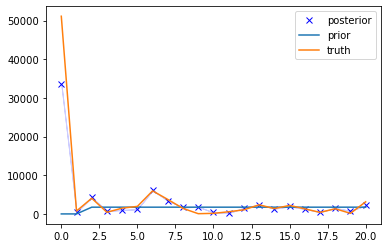

In [ ]:
mean = posterior.mean("time_state")
std = posterior.std("time_state")
line = plt.plot(mean, "bx", label="posterior")[0]
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2, color=line._color)

plt.plot(exp.emissions.prior_absolute.mean("time_state"), label="prior")
plt.plot(exp.emissions.truth_absolute.mean("time_state"), label="truth")
plt.legend()

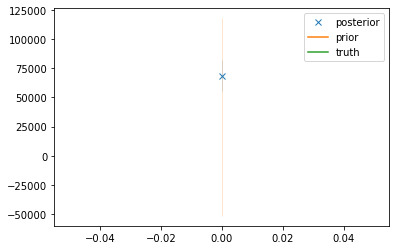

In [ ]:
mean = posterior.sum("source_group")
# std = np.tile(posterior.mean("source_group").std("time_state"), len(mean))
std = np.sqrt((posterior_covariance).sum("source_group"))
line = plt.plot(mean, "x", label="posterior")[0]
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2, color=line._color)

mean = exp.emissions.prior_absolute.sum("source_group")
std = np.sqrt(
    exp.emissions.prior_variance
    * exp.emissions.get_absolute()[exp.emissions.mask] ** 2
).sum("source_group")
line = plt.plot(mean, label="prior")[0]
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2, color=line._color)

plt.plot(exp.emissions.truth_absolute.sum("source_group"), label="truth")
plt.legend()


0.9392771851641731
0.4156784805055098
0.8411155458255388
1.2019297591900346
1.0353867820957041
0.9459619357072531
0.9966356116449577
0.9948094664377324
0.9568163901281711
2.3754020574327868
1.125309450134475
1.5674328326888736
0.09622908512444636
0.9549995091715493
1.014421956939244
0.992628115058451
0.9945536223908064
0.8888676572614314
1.0420431950653855
1.661835895459299
0.20342964770303312


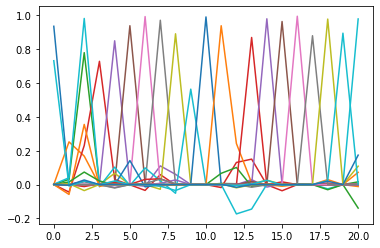

In [ ]:
averaging_kernel = exp.reg.get_averaging_kernel()
for i in range(averaging_kernel.shape[0]):
    kernel = averaging_kernel[i]
    plt.plot(kernel, label=kernel.sum())
    print(kernel.sum())
# plt.legend()


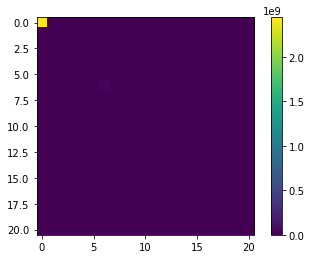

In [ ]:
im = plt.imshow(
    exp.emissions.truth_absolute.values
    * exp.reg.get_averaging_kernel()
    * exp.emissions.truth_absolute.values.T
)
plt.colorbar(im)


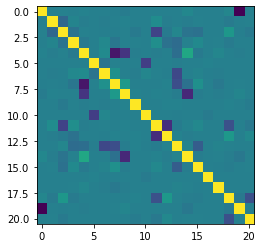

In [ ]:
plt.imshow(exp.reg.get_correlation())

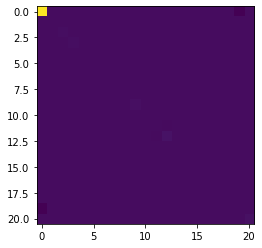

In [ ]:
plt.imshow(
    exp.emissions.truth_absolute.values
    * exp.reg.get_posterior_covariance()
    * exp.emissions.truth_absolute.values.T
)


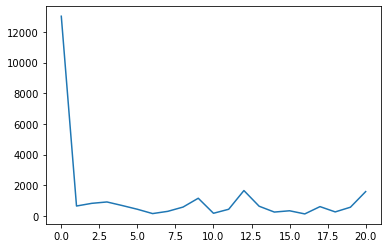

In [ ]:
plt.plot(
    np.sqrt(np.diag(exp.reg.get_posterior_covariance()))
    * exp.emissions.truth_absolute.values[:, 0]
)


In [ ]:
exp.reg.get_information_content(), exp.reg.get_dof_signal(), exp.reg.get_dof_noise()

(28.371533660094514, 16.663266611992587, 4.3367333880074135)